In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
from iertools.read import read_sql


In [2]:
f = '../kallapuma_EFN_HAVCT/Kallapuma_1_AFN_DO_sinCRACK.sql'
tmp = read_sql(f)
nombres = tmp.rename_from_sql()
tmp.rename(columns = nombres)
energy = tmp.data.copy()
energy

variable_name,AL T:Surface Inside Face Conduction Heat Transfer Rate (W),ALMACEN THERMAL ZONE:AFN Zone Infiltration Air Change Rate (ach),ALMACEN THERMAL ZONE:AFN Zone Infiltration Volume (m3),ALMACEN THERMAL ZONE:AFN Zone Ventilation Air Change Rate (ach),ALMACEN THERMAL ZONE:AFN Zone Ventilation Volume (m3),ALMACEN THERMAL ZONE:Zone Air System Sensible Cooling Energy (J),ALMACEN THERMAL ZONE:Zone Air System Sensible Heating Energy (J),Ti_ALMACENTHERMALZONE,BANIO DAMAS THERMAL ZONE:AFN Zone Infiltration Air Change Rate (ach),BANIO DAMAS THERMAL ZONE:AFN Zone Infiltration Volume (m3),...,TECHO PZB:Surface Inside Face Conduction Heat Transfer Rate (W),TECHO THERMAL ZONE:AFN Zone Infiltration Air Change Rate (ach),TECHO THERMAL ZONE:AFN Zone Infiltration Volume (m3),TECHO THERMAL ZONE:AFN Zone Ventilation Air Change Rate (ach),TECHO THERMAL ZONE:AFN Zone Ventilation Volume (m3),TECHO THERMAL ZONE:Zone Air System Sensible Cooling Energy (J),TECHO THERMAL ZONE:Zone Air System Sensible Heating Energy (J),Ti_TECHOTHERMALZONE,TEJADO 1:Surface Inside Face Conduction Heat Transfer Rate (W),TEJADO 2:Surface Inside Face Conduction Heat Transfer Rate (W)
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00,124.332899,0.0,0.0,0.0,0.0,NaN,NaN,7.950422,0.0,0.0,...,-16.483088,0.0,0.0,0.0,0.0,NaN,NaN,6.458544,-265.016437,-266.733208
2020-01-01 00:30:00,131.774423,0.0,0.0,0.0,0.0,NaN,NaN,7.890863,0.0,0.0,...,-17.356247,0.0,0.0,0.0,0.0,NaN,NaN,6.298748,-261.947991,-277.832883
2020-01-01 00:45:00,139.914701,0.0,0.0,0.0,0.0,NaN,NaN,7.827948,0.0,0.0,...,-18.282972,0.0,0.0,0.0,0.0,NaN,NaN,6.130922,-258.047252,-282.554257
2020-01-01 01:00:00,147.926742,0.0,0.0,0.0,0.0,0.0,0.0,7.762309,0.0,0.0,...,-19.278685,0.0,0.0,0.0,0.0,0.0,0.0,5.962260,-256.388302,-285.878389
2020-01-01 01:15:00,152.890052,0.0,0.0,0.0,0.0,NaN,NaN,7.697489,0.0,0.0,...,-20.262704,0.0,0.0,0.0,0.0,NaN,NaN,5.821662,-265.257623,-298.041363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00,112.001397,0.0,0.0,0.0,0.0,0.0,0.0,8.204970,0.0,0.0,...,-14.411282,0.0,0.0,0.0,0.0,0.0,0.0,6.834889,-288.250736,-278.738378
2020-12-31 23:15:00,120.173651,0.0,0.0,0.0,0.0,NaN,NaN,8.153988,0.0,0.0,...,-15.024338,0.0,0.0,0.0,0.0,NaN,NaN,6.706263,-272.651763,-261.447809
2020-12-31 23:30:00,131.400535,0.0,0.0,0.0,0.0,NaN,NaN,8.094382,0.0,0.0,...,-15.894454,0.0,0.0,0.0,0.0,NaN,NaN,6.509915,-280.644316,-269.977415


In [3]:
# DORMITORIO DAMAS:Zone Air System Sensible Cooling Energy (J)
# DORMITORIO DAMAS:Zone Air System Sensible Heating Energy (J)

In [4]:
hvact = energy[["DORMITORIO DAMAS:Zone Air System Sensible Heating Energy (J)","DORMITORIO DAMAS:Zone Air System Sensible Cooling Energy (J)"]]

<Axes: xlabel='date'>

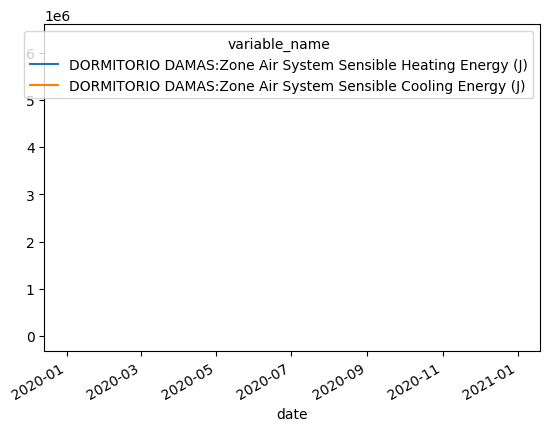

In [5]:
hvact.plot()

In [6]:
total_energy= hvact.groupby(by = [hvact.index.month]).sum()*2.77778E-7
total_energy

variable_name,DORMITORIO DAMAS:Zone Air System Sensible Heating Energy (J),DORMITORIO DAMAS:Zone Air System Sensible Cooling Energy (J)
date,,
1,336.873945,0.002172
2,308.225920,0.000000
3,354.229438,0.000000
4,414.813520,0.000000
5,461.417270,0.000000
6,464.433246,0.000000
7,564.931328,0.000000
8,440.325222,0.000000
9,377.477695,0.000000


<Axes: xlabel='date'>

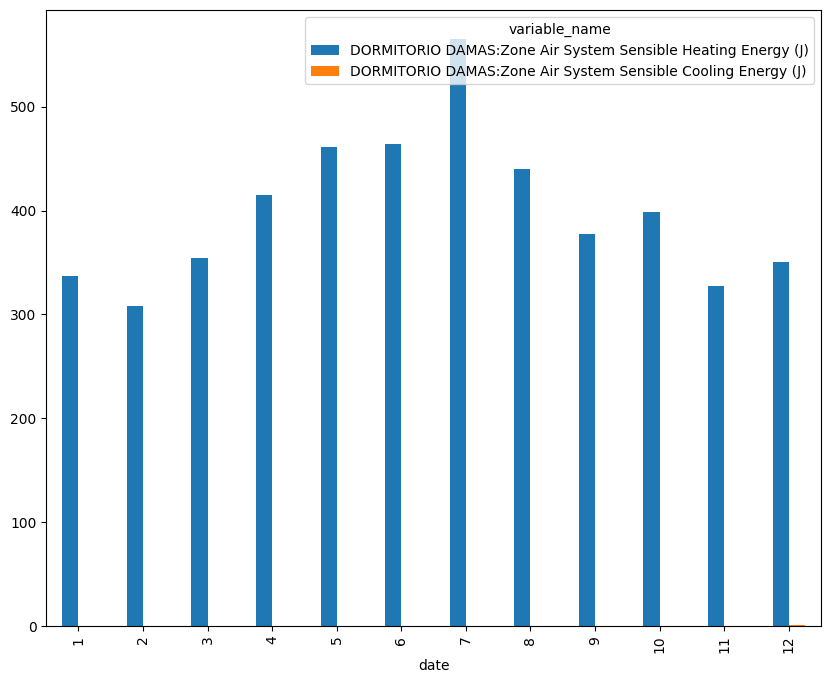

In [7]:
total_energy.plot(kind = "bar", figsize = (10,8))

In [8]:
air_interior = energy.Ti_DORMITORIODAMAS

In [9]:
mean_int = air_interior.groupby(by = [air_interior.index.month]).mean()

In [10]:
mean_int

date
1     15.700028
2     15.700009
3     15.500015
4     14.500363
5     13.400378
6     12.700249
7     12.400100
8     12.899831
9     14.099584
10    14.699803
11    15.199833
12    15.699850
Name: Ti_DORMITORIODAMAS, dtype: float64